In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from functools import partial
from random import choices, randint, randrange, random, sample
from typing import List, Optional, Callable, Tuple
import numpy as np
# from geneticalgorithm import geneticalgorithm as ga
import pandas as pd
from collections import Counter
from tqdm import tqdm
import time
from Bio.SeqUtils import MeltingTemp
from Bio import SeqIO
from plotly import graph_objects as go
import json
from imp import reload
# import primer_selection
# reload(primer_selection)
# import testing
# reload(testing)
import math
from itertools import combinations

from primer3 import calc_heterodimer


/tmp/ipykernel_1180320/2667737495.py:18: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
      in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [3]:
SNP_inclusion = pd.read_csv('/mnt/storage10/lwang/Projects/TOAST/cache/Amplicon_design_output_seg1/Amplicon_design_output/SNP_inclusion-33-300_800_50_3.csv')

In [4]:
SNP_inclusion['SNP'] = SNP_inclusion['SNP'].str.replace('p.', '', regex=False)
SNP_inclusion['SNP'] = SNP_inclusion['SNP'].str.replace('c.', '', regex=False)

In [5]:
gene = []
snps = []
for x in SNP_inclusion['SNP'].unique():
    gene.append(x.split('-')[0])
    snps.append(x.split('-')[1])
    
SNP_inclusion['Gene'] = gene
SNP_inclusion['SNP_'] = snps

In [6]:
SNP_inclusion

,SNP,Genomic_pos,Amplicon_ID,Gene,SNP_
0,gyrB-Arg446Cys,6575,A21-ns,gyrB,Arg446Cys
1,gyrB-Arg446His,6576,A21-ns,gyrB,Arg446His
2,gyrB-Arg446Leu,6576,A21-ns,gyrB,Arg446Leu
3,gyrB-Ser447Phe,6579,A21-ns,gyrB,Ser447Phe
4,gyrB-Asp461Asn,6620,A21-ns,gyrB,Asp461Asn
...,...,...,...,...,...
3532,gid-48_51delTGGC,4408151,A10-ns,gid,48_51delTGGC
3533,gid-48delT,4408154,A10-ns,gid,48delT
3534,gid-42delG,4408160,A10-ns,gid,42delG
3535,gid-41delC,4408161,A10-ns,gid,41delC


In [7]:
SNP_inclusion[['Amplicon_ID', 'Gene', 'SNP_']].to_csv('snp_inclusion1.csv', index=False)

In [8]:
# gene = []
# snps = []
# for g in SNP_inclusion['gene'].unique():
#     gene.append(g)
#     snp_ = SNP_inclusion[SNP_inclusion['gene'] == g]['SNP']
#     snp_ = [x.split('.')[1] for x in snp_]
#     snp_ = ', '.join(snp_)
#     snps.append(snp_)

# df = pd.DataFrame({'gene': gene, 'SNP': snps})

In [9]:
SNP_inclusion = SNP_inclusion[SNP_inclusion['Amplicon_ID'] != '-']

In [10]:
SNP_inclusion

,SNP,Genomic_pos,Amplicon_ID,Gene,SNP_
0,gyrB-Arg446Cys,6575,A21-ns,gyrB,Arg446Cys
1,gyrB-Arg446His,6576,A21-ns,gyrB,Arg446His
2,gyrB-Arg446Leu,6576,A21-ns,gyrB,Arg446Leu
3,gyrB-Ser447Phe,6579,A21-ns,gyrB,Ser447Phe
4,gyrB-Asp461Asn,6620,A21-ns,gyrB,Asp461Asn
...,...,...,...,...,...
3532,gid-48_51delTGGC,4408151,A10-ns,gid,48_51delTGGC
3533,gid-48delT,4408154,A10-ns,gid,48delT
3534,gid-42delG,4408160,A10-ns,gid,42delG
3535,gid-41delC,4408161,A10-ns,gid,41delC


In [11]:
snp_.tolist()

NameError: name 'snp_' is not defined

In [12]:
gene = []
snps = []
amplicon = []
for g in SNP_inclusion['Amplicon_ID'].unique():
    amplicon.append(g)
    snp_ = SNP_inclusion[SNP_inclusion['Amplicon_ID'] == g]['SNP_']
    gene_ = SNP_inclusion[SNP_inclusion['Amplicon_ID'] == g]['Gene']
    # snp_ = [x.split('.')[1] for x in snp_]
    # snp_ = ', '.join(snp_)
    snps.append(len(snp_))
    gene.append(gene_.unique()[0])

df = pd.DataFrame({'Amplicon_ID': amplicon, 'Gene': gene, 'SNP': snps})

In [13]:

import pandas as pd

# Assuming 'df' is your DataFrame and 'amplicon_id' is the column you want to sort by.

# Define the desired custom order for 'amplicon_id'
desired_order = [
    'A1-ns',
    'A1-sp',
    'A1-sp,A2-sp',
    'A2-sp',
    'A2-sp,A3-sp',
    'A2-ns',
    'A3-sp',
    'A3-ns',
    'A4-sp',
    'A4-ns',
    'A5-ns',
    'A6-ns',
    'A7-ns',
    'A8-ns',
    'A9-ns,A12-ns',
    'A9-ns',
    'A10-ns',
    'A11-ns',
    'A12-ns',
    'A13-ns',
    'A14-ns,A23-ns',
    'A14-ns',
    'A14-ns,A18-ns',
    'A15-ns,A18-ns',
    'A15-ns',
    'A16-ns',
    'A17-ns',
    'A18-ns',
    'A19-ns',
    'A20-ns',
    'A21-ns',
    'A22-ns',
    'A23-ns',
    'A24-ns',
    'A25-ns',
    'A26-ns',
    'A27-ns',
    'A28-ns',
    'A29-ns',
    '-'
]

# Convert the 'amplicon_id' column to a categorical data type with the specified order
df['Amplicon_ID'] = pd.Categorical(df['Amplicon_ID'], categories=desired_order, ordered=True)

# Sort the DataFrame according to the 'amplicon_ID' column
df_sorted = df.sort_values('Amplicon_ID')

# Reset index if needed
df_sorted = df_sorted.reset_index(drop=True)

# Display the sorted DataFrame


In [14]:
df_sorted

,Amplicon_ID,Gene,SNP
0,A1-ns,rpoB,160
1,A1-sp,katG,116
2,"A1-sp,A2-sp",katG,19
3,A2-sp,katG,296
4,"A2-sp,A3-sp",katG,10
5,A2-ns,pncA,961
6,A3-sp,katG,308
7,A3-ns,embB,89
8,A4-sp,mmpR5,6
9,A4-ns,rpsL,11


In [15]:
df_sorted.to_csv('snp_inclusion.csv', index=False)

# cache

In [16]:
amplicon = []
snps = []
gene = []
for g in SNP_inclusion['Amplicon_ID'].unique():
    amplicon.append(g)
    snp_ = SNP_inclusion[SNP_inclusion['Amplicon_ID'] == g]['SNP']
    # print(snp_) 
    # snp_ = [x.split('.')[1] for x in snp_]
    gene_ = SNP_inclusion[SNP_inclusion['Amplicon_ID'] == g]['Gene'].unique()
    print(gene_)
    gene = gene.append(gene_)
    snp_ = ', '.join(snp_)
    snps.append(snp_)   
    

df = pd.DataFrame({'Amplicon': amplicon, 'Gene':gene, 'SNP': snps})

['gyrB']
['gyrB' 'gyrA']


AttributeError: 'NoneType' object has no attribute 'append'

# dr determining snps

In [17]:
mmc2 = pd.read_excel('mmc2.xlsx', sheet_name='All characterisations', header=1) 


/mnt/storage10/lwang/miniconda3/envs/primer_selection/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [18]:
mmc2[(mmc2['Resistant'] != 0) & (mmc2['Final characterisation based on'] == 'training set')]['Resistant'].value_counts()

Resistant
1     98
2     20
3      6
4      6
6      1
18     1
Name: count, dtype: int64

In [19]:
dr_det = pd.read_csv('dr_det.csv')

### identifying location of the snps


In [20]:
from Bio import SeqIO

# Load the reference genome
genome_record = SeqIO.read('NC_000962.3[1..4411532].flat', 'genbank')

# Function to find genomic position
def find_genomic_position(gene_name, aa_position):
    for feature in genome_record.features:
        if feature.type == 'CDS' and 'gene' in feature.qualifiers:
            if gene_name in feature.qualifiers['gene']:
                gene_start = feature.location.start.position
                gene_end = feature.location.end.position
                strand = feature.location.strand
                # Calculate codon position
                codon_position = (aa_position - 1) * 3
                if strand == 1:
                    genomic_position = gene_start + codon_position
                else:
                    genomic_position = gene_end - codon_position - 1
                return genomic_position
    return None

# Example usage
mutation = 'katG_S315T'
gene_name, mutation_info = mutation.split('_')
aa_position = int(''.join(filter(str.isdigit, mutation_info)))

genomic_pos = find_genomic_position(gene_name, aa_position)
print(f"Genomic position of {mutation}: {genomic_pos}")


Genomic position of katG_S315T: 2155168


/mnt/storage10/lwang/miniconda3/envs/primer_selection/lib/python3.11/site-packages/Bio/SeqFeature.py:1940: BiopythonDeprecationWarning: Alias location.position is deprecated and will be removed in a future release. Use location directly, or int(location). However, that will fail for UnknownPosition, and for OneOfPosition and WithinPosition will give the default rather than left-most value.
  warnings.warn(


In [21]:

mutation = 'gid_141delC'
gene_name, mutation_info = mutation.split('_')
aa_position = int(''.join(filter(str.isdigit, mutation_info)))

genomic_pos = find_genomic_position(gene_name, aa_position)
print(f"Genomic position of {mutation}: {genomic_pos}")

Genomic position of gid_141delC: 4407781


In [22]:
for x in dr_det['Mutations']:
    print(x)
    gene_name, mutation_info = x.split('_')
    aa_position = int(''.join(filter(str.isdigit, mutation_info)))
    genomic_pos = find_genomic_position(gene_name, aa_position)
    print(f"Genomic position of {x}: {genomic_pos}")

ahpC_C-57T
Genomic position of ahpC_C-57T: 2726360
eis_G-10A
Genomic position of eis_G-10A: 2715304
embB_D354A
Genomic position of embB_D354A: 4247572
embB_G406A
Genomic position of embB_G406A: 4247728
embB_G406D
Genomic position of embB_G406D: 4247728
embB_G406S
Genomic position of embB_G406S: 4247728
embB_H1002R
Genomic position of embB_H1002R: 4249516
embB_M306I
Genomic position of embB_M306I: 4247428
embB_M306V
Genomic position of embB_M306V: 4247428
embB_Q497K
Genomic position of embB_Q497K: 4248001
embB_Q497R
Genomic position of embB_Q497R: 4248001
fabG1_C-15T
Genomic position of fabG1_C-15T: 1673481
fabG1_G-17T
Genomic position of fabG1_G-17T: 1673487
fabG1_T-8C
Genomic position of fabG1_T-8C: 1673460
gidB_141_delC


ValueError: too many values to unpack (expected 2)

## who resistance

In [23]:
who = pd.read_excel('WHO-UCN-GTB-PCI-2021.7-eng.xlsx', sheet_name='Mutation_catalogue', header=1)

In [24]:
who['Unnamed: 51'].value_counts()   

Unnamed: 51
3) Uncertain significance     15910
2) Assoc w R - Interim         1004
5) Not assoc w R                213
1) Assoc w R                    196
combo                            40
4) Not assoc w R - Interim       33
Name: count, dtype: int64

In [25]:
who = who[['Unnamed: 0','Unnamed: 2','Unnamed: 3','Unnamed: 51']]
who = who.dropna()
who.loc[:, 'gene'] = who['Unnamed: 2'].apply(lambda x: x.split('_')[0])
who = who[who['Unnamed: 51'].isin(['2) Assoc w R - Interim', '1) Assoc w R'])]

In [26]:
detected = pd.DataFrame(columns=['DR', 'SNP', 'Genomic_position', 'Grading', 'Gene'])

bed_df = pd.read_csv('33amplicon.bed', sep='\t', header=None)

# Initialize a list to store depth information
depth_info = []

# Calculate depth for each genomic range in the BED file
all_on_target_reads = 0
for index, row in bed_df.iterrows():
    name = row[3]
    chrom = row[0]
    start = row[1]
    end = row[2]
    for i, r in who.iterrows():
        if r['Unnamed: 3'] in (range(start, end+1)):
            detected.loc[len(detected)] = [r['Unnamed: 0'], r['Unnamed: 2'], r['Unnamed: 3'], r['Unnamed: 51'], r['gene']]
            # detected = detected.append({'DR': r['Unnamed: 0'], 'SNP': r['Unnamed: 2'], 'Genomic_position': r['Unnamed: 3'], 'Grading': r['Unnamed: 51']}, ignore_index=True)
        else:
            continue
detected.drop_duplicates(inplace=True)

In [27]:
detected['DR']

0      INH
1      INH
2      INH
3      INH
4      INH
      ... 
772    CAP
773    CAP
774    CAP
775    CAP
776    CAP
Name: DR, Length: 742, dtype: object

In [28]:
detected['DR'].value_counts() / who['Unnamed: 0'].value_counts()

DR
ETH    1.000000
PZA    0.933735
STM    1.000000
INH    1.000000
RIF    1.000000
CAP    0.633333
KAN    1.000000
AMI    1.000000
EMB    1.000000
Name: count, dtype: float64

In [29]:
print(detected['DR'].value_counts())
print(who['Unnamed: 0'].value_counts())
print('---------------------------------')
print(detected['Gene'].value_counts())
print(who['gene'].value_counts())
print('---------------------------------')

print(detected['Grading'].value_counts())
print(who['Unnamed: 51'].value_counts())


DR
ETH    270
PZA    155
STM    143
INH     97
RIF     45
CAP     19
KAN      8
AMI      4
EMB      1
Name: count, dtype: int64
Unnamed: 0
ETH    270
PZA    166
STM    143
INH     97
RIF     45
CAP     30
KAN      8
AMI      4
EMB      1
Name: count, dtype: int64
---------------------------------
Gene
ethA    265
pncA    155
gid     140
katG     92
rpoB     45
tlyA     16
rrs      12
inhA     10
eis       6
embA      1
Name: count, dtype: int64
gene
ethA    265
pncA    166
gid     140
katG     92
rpoB     45
tlyA     27
rrs      12
inhA     10
eis       6
embA      1
Name: count, dtype: int64
---------------------------------
Grading
2) Assoc w R - Interim    707
1) Assoc w R               35
Name: count, dtype: int64
Unnamed: 51
2) Assoc w R - Interim    727
1) Assoc w R               37
Name: count, dtype: int64


In [30]:
# Get the value counts for each column
detected_counts = detected['DR'].value_counts()
who_counts = who['Unnamed: 0'].value_counts()

# Calculate the percentage
percentage = (detected_counts / who_counts) * 100

# Combine counts and percentages in a DataFrame for easier viewing
result = pd.DataFrame({
    'Detected Count': detected_counts,
    'Who Count': who_counts,
    'Percentage (%)': percentage
})

# Display the result
print(result)   


     Detected Count  Who Count  Percentage (%)
ETH             270        270      100.000000
PZA             155        166       93.373494
STM             143        143      100.000000
INH              97         97      100.000000
RIF              45         45      100.000000
CAP              19         30       63.333333
KAN               8          8      100.000000
AMI               4          4      100.000000
EMB               1          1      100.000000


In [31]:
result.to_csv('who_result.csv', index=True)

In [32]:
amplicon_ranges = pd.read_csv('/mnt/storage10/lwang/Projects/TOAST/cache/Amplicon_design_output_seg1/Amplicon_design_output/Primer_design-accepted_primers-33-300_800_50_3-newAcopy1.csv')
snp_priority = pd.read_csv('/mnt/storage10/lwang/Projects/TOAST/toast/db/snp_priority.csv')
snp_priority = snp_priority.drop_duplicates(subset=['change'])

In [34]:
_ = pd.DataFrame(columns=snp_priority.columns)
for i, row in amplicon_ranges.iterrows():
    # print(row['Amplicon_ID'], row['Start'], row['End'])
    insert_ = snp_priority[(snp_priority['genome_pos'] >= row['pLeft_coord']) & (snp_priority['genome_pos'] <= row['pRight_coord'])]
    _ = pd.concat([_, insert_])
    # print(snp_priority['gene'].value_counts())
    # break
    

/tmp/ipykernel_4064488/1000910402.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  _ = pd.concat([_, insert_])


In [38]:
_['gene'].value_counts()/snp_priority['gene'].value_counts().round(2)*100

gene
ahpC      92.857143
ald             NaN
alr       66.666667
ddn      100.000000
eis      100.000000
embA      50.000000
embB      92.000000
embC            NaN
embR            NaN
ethA     100.676437
ethR     100.000000
fabG1    100.000000
fbiA            NaN
fgd1            NaN
folC     100.000000
gid       99.193548
gyrA     100.000000
gyrB     100.000000
inhA      88.888889
kasA            NaN
katG      91.577699
mmpR5    100.000000
panD            NaN
pncA      72.354949
ribD            NaN
rplC     100.000000
rpoB      98.170732
rpoC            NaN
rpsA            NaN
rpsL     100.000000
rrl      100.000000
rrs      126.923077
thyA      29.670330
thyX     100.000000
tlyA      56.015038
Name: count, dtype: float64

In [7]:
import numpy as np

In [8]:
np.mean([x for x in range(500, 801,50)])

650.0

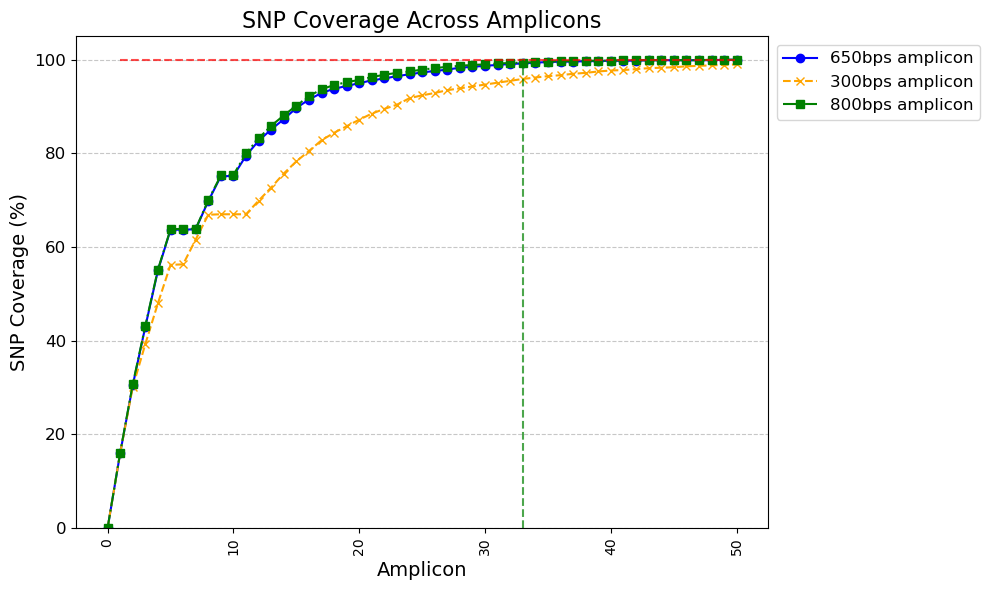

In [5]:
# Re-import necessary libraries after reset
import matplotlib.pyplot as plt

# Re-define data after reset
amplicons = [i for i in range(0, 51)]
snp_coverage = [
    0,16.0, 30.5, 43.0, 55.0, 63.7, 63.7, 63.8, 69.8, 75.1, 75.2,
    79.5, 82.7, 85.1, 87.3, 89.7, 91.5, 92.9, 93.8, 94.4, 95.0,
    95.6, 96.0, 96.5, 96.9, 97.3, 97.6, 97.9, 98.3, 98.5, 98.7,
    98.9, 99.1, 99.2, 99.4, 99.5, 99.6, 99.6, 99.7, 99.7, 99.8,
    99.8, 99.8, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 100.0, 100.0
]

snp_coverage_curve2 = [
    0,16.0, 30.1, 39.3, 48.0, 56.2, 56.3, 61.6, 66.9, 67.0, 67.0,
    67.0, 69.9, 72.7, 75.7, 78.3, 80.5, 82.8, 84.4, 85.8, 87.2,
    88.5, 89.5, 90.4, 91.8, 92.4, 92.9, 93.5, 93.9, 94.3, 94.7,
    95.1, 95.5, 95.9, 96.2, 96.5, 96.7, 97.0, 97.2, 97.5, 97.7,
    97.8, 98.0, 98.2, 98.3, 98.4, 98.6, 98.7, 98.8, 98.9, 99.0
]

snp_coverage_curve3 = [
    0,16.1, 30.7, 43.2, 55.2, 63.8, 63.9, 63.9, 70.0, 75.3, 75.4,
    80.0, 83.2, 85.9, 88.1, 90.2, 92.2, 93.7, 94.6, 95.2, 95.7,
    96.3, 96.8, 97.2, 97.5, 97.9, 98.2, 98.5, 98.7, 98.9, 99.0,
    99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.7, 99.8, 99.8, 99.8,
    99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 100.0, 100.0, 100.0
]

# Plot all three curves
plt.figure(figsize=(10, 6))
plt.plot(amplicons, snp_coverage, marker='o', linestyle='-', color='blue', label='650bps amplicon')
plt.plot(amplicons, snp_coverage_curve2, marker='x', linestyle='--', color='orange', label='300bps amplicon')
plt.plot(amplicons, snp_coverage_curve3, marker='s', linestyle='-.', color='green', label='800bps amplicon')

# Customize the plot
plt.title('SNP Coverage Across Amplicons', fontsize=16)
plt.xlabel('Amplicon', fontsize=14)
plt.ylabel('SNP Coverage (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.ylim(0, 105)  # Set y-axis limit slightly above 100 for visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot

# Add horizontal and vertical lines
plt.hlines(y=100, xmin=1, xmax=50, color='red', linestyle='--', alpha=0.7)
plt.vlines(x=33, ymin=0, ymax=100, color='green', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


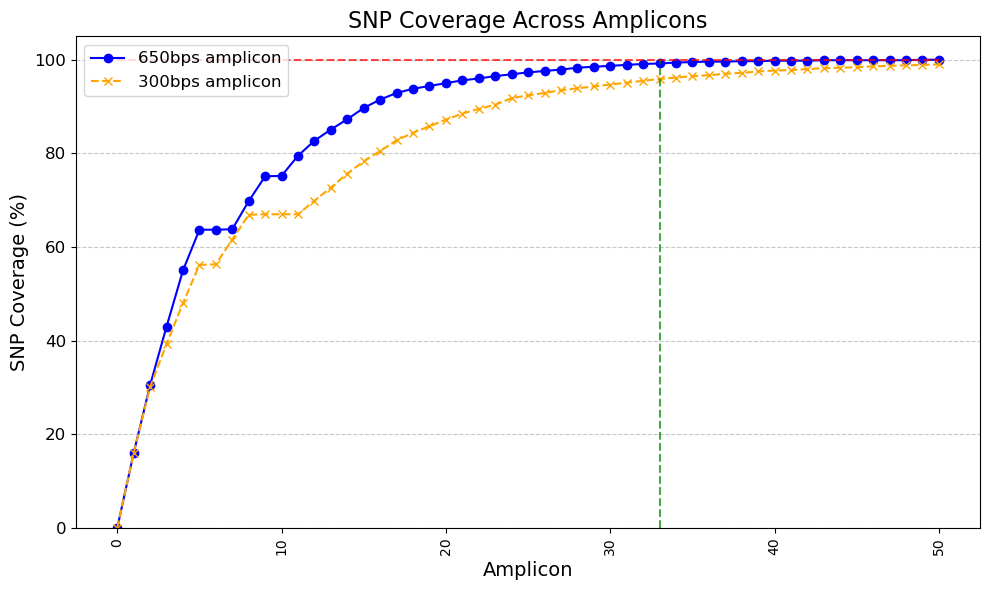

In [ ]:
# Re-import necessary libraries after reset
import matplotlib.pyplot as plt

# Data for the line plot
amplicons = [i for i in range(0, 51)]
snp_coverage = [
    0, 16.0, 30.5, 43.0, 55.0, 63.7, 63.75, 63.8, 69.8, 75.1, 75.2,
    79.5, 82.7, 85.1, 87.3, 89.7, 91.5, 92.9, 93.8, 94.4, 95.0,
    95.6, 96.0, 96.5, 96.9, 97.3, 97.6, 97.9, 98.3, 98.5, 98.7,
    98.9, 99.1, 99.2, 99.4, 99.5, 99.6, 99.6, 99.7, 99.7, 99.8,
    99.8, 99.8, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 100.0, 100.0
]

# Data for the second curve
snp_coverage_curve2 = [
    0, 16.0, 30.1, 39.3, 48.0, 56.2, 56.3, 61.6, 66.9, 67.0, 67.0,
    67.0, 69.9, 72.7, 75.7, 78.3, 80.5, 82.8, 84.4, 85.8, 87.2,
    88.5, 89.5, 90.4, 91.8, 92.4, 92.9, 93.5, 93.9, 94.3, 94.7,
    95.1, 95.5, 95.9, 96.2, 96.5, 96.7, 97.0, 97.2, 97.5, 97.7,
    97.8, 98.0, 98.2, 98.3, 98.4, 98.6, 98.7, 98.8, 98.9, 99.0
]

# Plot both curves
plt.figure(figsize=(10, 6))
plt.plot(amplicons, snp_coverage, marker='o', linestyle='-', color='blue', label='650bps amplicon')
plt.plot(amplicons, snp_coverage_curve2, marker='x', linestyle='--', color='orange', label='300bps amplicon')

# Customize the plot
plt.title('SNP Coverage Across Amplicons', fontsize=16)
plt.xlabel('Amplicon', fontsize=14)
plt.ylabel('SNP Coverage (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.ylim(0, 105)  # Set y-axis limit slightly above 100 for visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.hlines(y=100, xmin=0, xmax=50, color='red', linestyle='--', alpha=0.7)
plt.vlines(x=33, ymin=0, ymax=100, color='green', linestyle='--', alpha=0.7)
# Show the plot
plt.show()


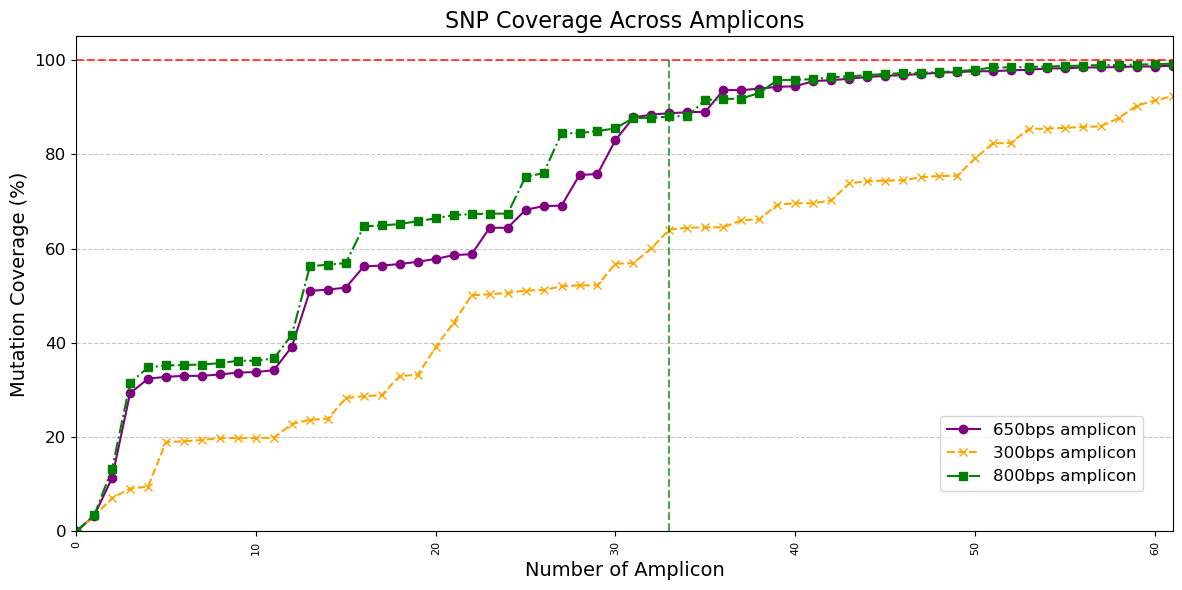

In [27]:
import matplotlib.pyplot as plt

# Define data for three SNP coverage curves
amplicons1 = [i for i in range(0, 74)]
snp_coverage_curve1 = [
    0, 3.3, 11.4, 29.3, 32.4, 32.8, 33.0, 33.0, 33.3, 33.7, 33.8, 34.2, 39.2,
    51.0, 51.3, 51.7, 56.2, 56.4, 56.7, 57.2, 57.8, 58.6, 58.8, 64.4, 64.4,
    68.2, 69.0, 69.1, 75.6, 75.8, 83.0, 87.8, 88.4, 88.7, 88.9, 89.0, 93.6,
    93.6, 93.9, 94.3, 94.4, 95.5, 95.7, 96.0, 96.4, 96.6, 96.8, 97.0, 97.3,
    97.4, 97.6, 97.6, 97.8, 97.9, 98.2, 98.2, 98.4, 98.4, 98.5, 98.6, 98.6,
    98.8, 98.9, 98.9, 99.0, 99.1, 99.2, 99.2, 99.3, 99.3, 99.4, 99.4, 99.4, 99.5
]

amplicons2 = [i for i in range(0, 80)]
snp_coverage_curve2 = [
    0, 3.2, 7.1, 9.1, 9.5, 19.0, 19.1, 19.4, 19.8, 19.8, 19.8, 19.9, 22.8, 23.7, 23.9,
    28.3, 28.7, 28.9, 33.0, 33.2, 39.1, 44.3, 50.1, 50.3, 50.6, 51.1, 51.2, 52.0,
    52.2, 52.2, 56.8, 56.9, 60.1, 64.0, 64.4, 64.5, 64.5, 66.0, 66.2, 69.3, 69.6,
    69.6, 70.2, 73.8, 74.3, 74.4, 74.5, 75.1, 75.4, 75.4, 79.1, 82.3, 82.4, 85.4,
    85.4, 85.6, 85.8, 85.9, 87.7, 90.3, 91.4, 92.3, 92.4, 92.5, 92.5, 92.6, 92.7,
    92.9, 94.1, 94.3, 94.4, 94.7, 94.9, 94.9, 95.0, 95.8, 95.9, 96.0, 96.1, 96.3
]

amplicons3 = [i for i in range(0, 76)]
snp_coverage_curve3 = [
    0, 3.4, 13.3, 31.5, 34.8, 35.2, 35.3, 35.4, 35.7, 36.2, 36.2, 36.7, 41.7, 56.2, 
    56.6, 56.9, 64.7, 64.9, 65.2, 65.8, 66.4, 67.1, 67.3, 67.4, 67.4, 75.2, 76.0,
    84.4, 84.5, 84.9, 85.5, 87.7, 87.7, 88.0, 88.1, 91.5, 91.7, 91.8, 93.0, 95.7,
    95.8, 95.9, 96.3, 96.5, 96.8, 97.0, 97.2, 97.3, 97.4, 97.6, 97.9, 98.4, 98.4,
    98.5, 98.6, 98.7, 98.8, 98.9, 98.9, 99.0, 99.1, 99.2, 99.2, 99.3, 99.4, 99.5,
    99.6, 99.6, 99.7, 99.7, 99.8, 99.8, 99.8, 99.9, 99.9, 100.0
]

# Plot all three curves
plt.figure(figsize=(12, 6))
plt.plot(amplicons1, snp_coverage_curve1, marker='o', linestyle='-', color='purple', label='650bps amplicon')
plt.plot(amplicons2, snp_coverage_curve2, marker='x', linestyle='--', color='orange', label='300bps amplicon')
plt.plot(amplicons3, snp_coverage_curve3, marker='s', linestyle='-.', color='green', label='800bps amplicon')

plt.hlines(y=100, xmin=0, xmax=61, color='red', linestyle='--', alpha=0.7)
plt.vlines(x=33, ymin=0, ymax=100, color='green', linestyle='--', alpha=0.7)

# Customize the plot
plt.title('SNP Coverage Across Amplicons', fontsize=16)
plt.xlabel('Number of Amplicon', fontsize=14)
plt.ylabel('Mutation Coverage (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.ylim(0, 105)  # Y-axis limit slightly above 100 for visibility
plt.xlim(0,61)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.legend(fontsize=12)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.78, 0.25))  # Move legend outside the plot


# Show the plot
plt.tight_layout()
plt.show()
